In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns

In [21]:
with open("data/beatmap_data.pkl", "rb") as pkl:
    loaded = pickle.load(pkl)

b_id, b_data, b_extra_data, b_skill = zip(*[(l[1], l[2], l[3], l[4])for l in loaded])
b_extra_data = np.array(b_extra_data)
df = pd.DataFrame({"ID":b_id, "Skillset":b_skill, "AR":b_extra_data.flatten()})

df.head(7)

,ID,Skillset,AR
0,2445425,AIM,0.850000
1,2306846,AIM,0.800000
2,2306846,AIM,5.426667
3,2307246,ALT,0.930000
4,2308377,AIM,0.900000
5,2308377,AIM,5.480000
6,2308964,AIM,0.970000


In [ ]:
max_b = []
min_b = []
avg_b = []
for i,b in enumerate(b_data):
    if b.max()>1024 or b.min()<-1024: print(i)
    max_b.append(b.max())
    min_b.append(b.min())
    avg_b.append(b.mean())

3846
5261
5334
5396
7832
10001
15998
16558
17433


In [92]:

part = 1000000
a = 0
print(np.max(max_b[a:part]),np.mean(max_b[a:part]))

5.999999999999999e+304 3.2806605063152706e+300


In [39]:
np.mean(max_b)

3.2806605063152706e+300

In [23]:
b_data[0].min()

-0.015128968253968252

In [24]:
df.Skillset.unique()

array(['AIM', 'ALT', 'TECH', 'RHYTHM', 'STREAM', 'SPEED'], dtype=object)

<Axes: xlabel='Skillset', ylabel='percent'>

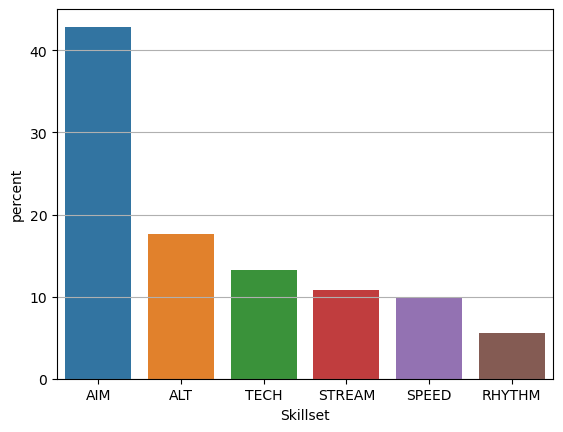

In [4]:
plt.grid()
sns.countplot(df, x="Skillset", hue="Skillset",order=df.Skillset.value_counts().keys(), hue_order=df.Skillset.value_counts().keys(), stat="percent")

In [5]:
df.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).iloc[1:]

,AR
mean,1.655682
std,1.672699
min,0.400000
5%,0.800000
25%,0.900000
50%,0.940000
75%,0.970000
95%,5.480000
max,5.528000


In [6]:
b_len = [len(b) for b in b_data]

In [7]:
stats = pd.DataFrame({"Beatmap Objects":b_len}).describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95])
stats

,Beatmap Objects
count,18289.000000
mean,1382.513587
std,498.518463
min,358.000000
25%,1032.000000
50%,1318.000000
75%,1637.000000
90%,1981.200000
95%,2257.000000
max,14892.000000


In [8]:
stats.loc["count",:]

Beatmap Objects    18289.0
Name: count, dtype: float64

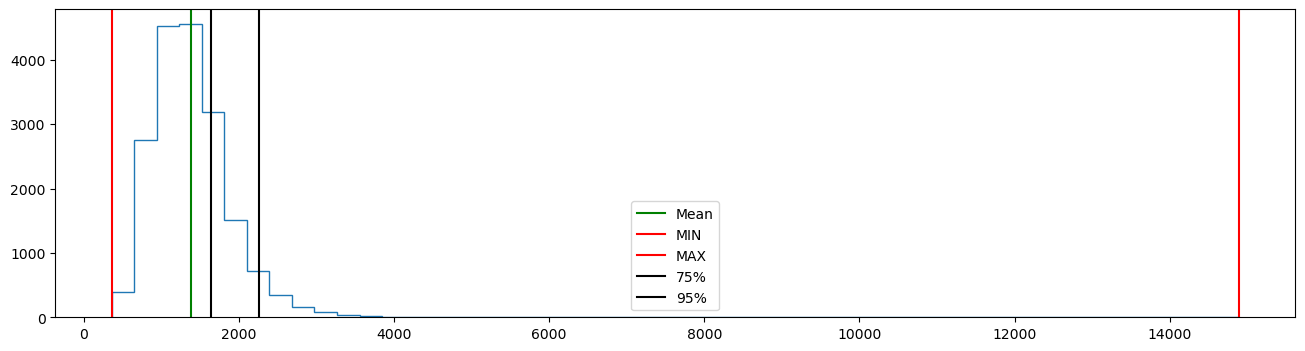

In [9]:
plt.figure(figsize=(16,4))
plt.hist(b_len, bins=50, histtype="step")
plt.axvline(stats.loc["mean"].values, color="green", label ="Mean")
plt.axvline(stats.loc["min"].values, color="red", label ="MIN")
plt.axvline(stats.loc["max"].values, color="red", label ="MAX")
plt.axvline(stats.loc["75%"].values, color="black", label ="75%")
plt.axvline(stats.loc["95%"].values, color="black", label ="95%")
plt.legend()
plt.show()

In [10]:
import re
def parse_collection_from_txt(string):
        return re.findall(r"https://osu\.ppy\.sh/s/(\d+)", string), re.findall(r"★\((\d+)\)", string)

def get_beatmapdata():
    skills = ["AIM", "STREAM", "ALT", "TECH", "SPEED", "RHYTHM", "DT_AIM", "DT_ALT", "DT_TECH", "DT_SPEED", "DT_RHYTHM"]
    skill_strings = []
    for skill in skills:
        with open(f"chiv_collections/{skill}.txt", encoding="utf-8", errors="ignore") as f:
            skill_strings.append(''.join(f.readlines()))


    set_ids_dict = {}
    beatmap_ids_dict = {}
    for i,skill in enumerate(skill_strings):
        set_ids_dict[skills[i]], beatmap_ids_dict[skills[i]] = parse_collection_from_txt(skill)
    return set_ids_dict, beatmap_ids_dict

set_ids_dict, beatmap_ids_dict = get_beatmapdata()

In [11]:
[(len(beatmap_ids_dict[key]), key) for key in beatmap_ids_dict.keys()]

[(8009, 'AIM'),
 (2226, 'STREAM'),
 (3208, 'ALT'),
 (2705, 'TECH'),
 (743, 'SPEED'),
 (761, 'RHYTHM'),
 (785, 'DT_AIM'),
 (620, 'DT_ALT'),
 (113, 'DT_TECH'),
 (1251, 'DT_SPEED'),
 (603, 'DT_RHYTHM')]

In [12]:
overlaps = {}
for key1 in beatmap_ids_dict:
    for key2 in beatmap_ids_dict:
        if key1 < key2:  # avoid duplicates and self-comparison
            overlap = set(beatmap_ids_dict[key1]) & set(beatmap_ids_dict[key2])
            overlaps[(key1, key2)] = len(overlap)

In [13]:
overlaps

{('AIM', 'STREAM'): 24,
 ('AIM', 'ALT'): 99,
 ('AIM', 'TECH'): 72,
 ('AIM', 'SPEED'): 5,
 ('AIM', 'RHYTHM'): 21,
 ('AIM', 'DT_AIM'): 785,
 ('AIM', 'DT_ALT'): 44,
 ('AIM', 'DT_TECH'): 3,
 ('AIM', 'DT_SPEED'): 62,
 ('AIM', 'DT_RHYTHM'): 20,
 ('STREAM', 'TECH'): 45,
 ('ALT', 'STREAM'): 41,
 ('ALT', 'TECH'): 78,
 ('ALT', 'SPEED'): 1,
 ('ALT', 'RHYTHM'): 96,
 ('ALT', 'DT_AIM'): 1,
 ('ALT', 'DT_ALT'): 620,
 ('ALT', 'DT_TECH'): 5,
 ('ALT', 'DT_SPEED'): 4,
 ('ALT', 'DT_RHYTHM'): 52,
 ('SPEED', 'STREAM'): 6,
 ('SPEED', 'TECH'): 5,
 ('RHYTHM', 'STREAM'): 57,
 ('RHYTHM', 'TECH'): 30,
 ('RHYTHM', 'SPEED'): 0,
 ('DT_AIM', 'STREAM'): 1,
 ('DT_AIM', 'TECH'): 1,
 ('DT_AIM', 'SPEED'): 0,
 ('DT_AIM', 'RHYTHM'): 6,
 ('DT_AIM', 'DT_ALT'): 1,
 ('DT_AIM', 'DT_TECH'): 1,
 ('DT_AIM', 'DT_SPEED'): 3,
 ('DT_AIM', 'DT_RHYTHM'): 6,
 ('DT_ALT', 'STREAM'): 1,
 ('DT_ALT', 'TECH'): 9,
 ('DT_ALT', 'SPEED'): 0,
 ('DT_ALT', 'RHYTHM'): 37,
 ('DT_ALT', 'DT_TECH'): 4,
 ('DT_ALT', 'DT_SPEED'): 0,
 ('DT_ALT', 'DT_RHYTHM'): 3